In [1]:
# importing the necessary lib/packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload data using pandas data frame
data = pd.read_csv('titanic3.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#the attributes body and boat are dropped.
data = data.drop(['boat','body'],axis=1)

In [5]:
data['embarked'].value_counts()


S    914
C    270
Q    123
Name: embarked, dtype: int64

,Total,Percent
age,263,20.091673
cabin,1014,77.463713
embarked,2,0.152788
fare,1,0.076394
home.dest,564,43.086325


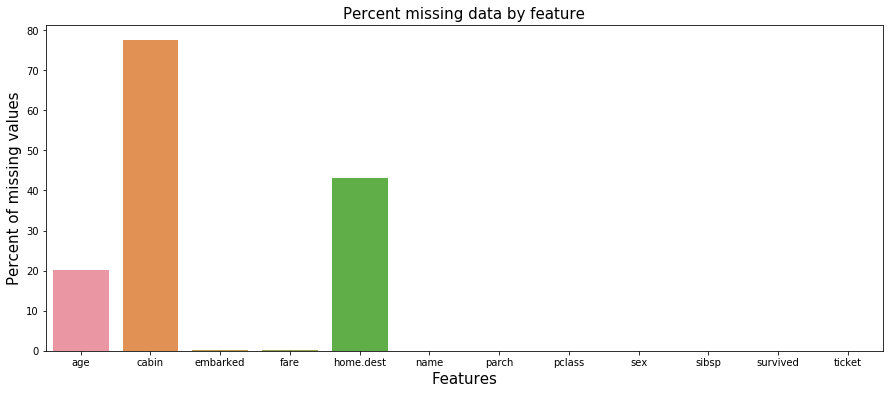

In [6]:
# missing data with aggregation and graph
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count().sort_values(ascending=False))*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [7]:
#filled empty fare with median
data.fare.fillna(data.fare.median(),inplace=True)

In [8]:
# filled empty embarked values with most repeated one
data.embarked.fillna(data.embarked.mode()[0],inplace=True)

In [9]:
# I am removing the cabin and home destination as there are more data missing. I think It won't affect the model.
data = data.drop(['cabin','home.dest'],axis=1)

In [10]:
# I am using mean to fill the missing age data.
data.age.fillna(data.age.mean(),inplace=True)

In [11]:
# i am coverting sex column(male,female) to 0 or 1 
data['sex'] = pd.factorize(data.sex)[0]

# i am droping name,ticket,embarked because they all are independent 
data = data.drop(['name','ticket','embarked'],axis=1)

#seperate dataset into x and y
x = data.drop(['survived'],axis=1)
y = data['survived']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


In [12]:
#split data set into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [13]:
# create a decision tree model and train the model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
y1_predict = model1.predict(x_test)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve
print(accuracy_score(y1_predict,y_test))
print(roc_auc_score(y1_predict,y_test))

0.7633587786259542
0.7436254643701452


In [14]:
# create a logistic regression model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train,y_train)
y2_predict = model2.predict(x_test)

# finding an accuracy and area under roc curve
print(accuracy_score(y2_predict,y_test))
print(roc_auc_score(y2_predict,y_test))

0.7811704834605598
0.7634470130464638


/Users/nikhilr/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


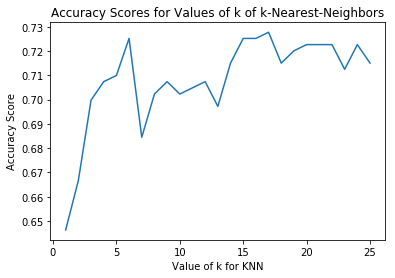

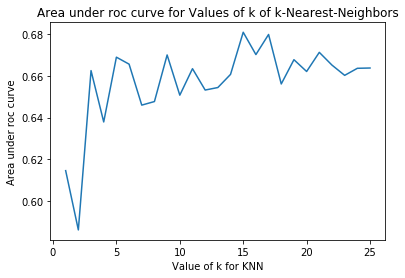

In [15]:
# create k nearest neighbor model
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,26))
scores = []
curve = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y3_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y3_pred))
    curve.append(roc_auc_score(y_test, y3_pred))
    
   
# finding an accuracy and area under roc curve for different values of k and plotting it.
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, curve)
plt.xlabel('Value of k for KNN')
plt.ylabel('Area under roc curve')
plt.title('Area under roc curve for Values of k of k-Nearest-Neighbors')
plt.show()

In [16]:
#creating the random forest model
from sklearn.ensemble import RandomForestClassifier
# model4 = RandomForestClassifier()
model4 = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
model4.fit(x_train,y_train)
y4_predict = model4.predict(x_test)

# finding an accuracy and area under roc curve
print(accuracy_score(y4_predict,y_test))
print(roc_auc_score(y4_predict,y_test))

0.8142493638676844
0.80312000473625


In [17]:
results = pd.DataFrame({
    'Model': ['Decision Tree',
              'Logistic Regression', 
              'Random Forest'
              ],
    'Score': [accuracy_score(y1_predict,y_test),
              accuracy_score(y2_predict,y_test),
              accuracy_score(y4_predict,y_test)]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.814249,Random Forest
0.781170,Logistic Regression
0.763359,Decision Tree


In [18]:
results = pd.DataFrame({
    'Model': ['Decision Tree',
              'Logistic Regression', 
              'Random Forest'
              ],
    'Score': [roc_auc_score(y1_predict,y_test),
              roc_auc_score(y2_predict,y_test),
              roc_auc_score(y4_predict,y_test)]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.803120,Random Forest
0.763447,Logistic Regression
0.743625,Decision Tree
